<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bdu.9.2.random_forest.titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 랜덤 포레스트  알고리즘 개요.

   . 다수의 의사 결정 트리들을 배깅 하여, 분류 또는 회귀를 수행하는 앙상블 기법

   . 각 트리는 전체 학습 데이터 중 **서로 다른 데이터를 샘플링하여** 일부 데이터를 제외한 후 최적의 특징을 찾아 트리를 분기

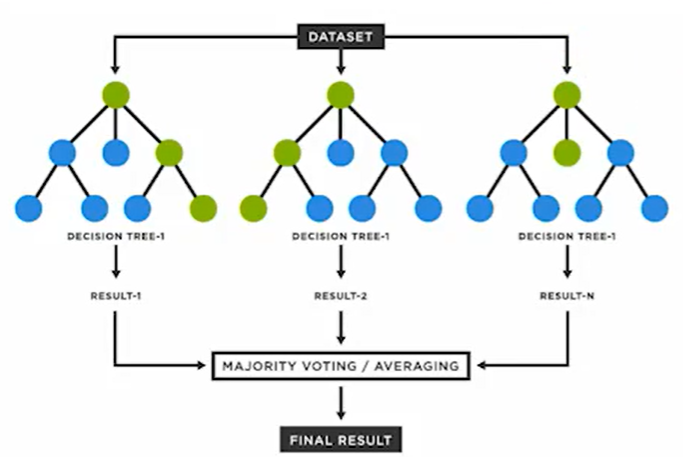

 decision tree와 동일하게, 여러가지 decision tree 들을 사용한다.  

 . 배깅 ?  " 같은 종류의 알고리즘을 여러개 사용해서 결합하는 것"
    : 장점 : 모델의 과대 적합 위험을 감소
      섞어서 샘플링하기 때문에 일반화 할 수 있는 장점

      

 . 앙상블  ?  두개 이상의 알고리즘을 사용한다.

 . 각각의 서로 다른 데이터를 가지고 **sampling하여 ** 분기 처리한다.

 . 위 그리메서  하나 하나는 decision tree 들이 모여 있는 것이다.
   전체를 가져 오는 것이 아니라, 일부만 가져 오는데,  이것을 샘플링 (섞는다)

  . 데이터를 random하게 섞어서 가져온다.

  . 결과를 가져와서 어느 것이 좋은지  voting (투표)를 하거나, 평균을 이용해서 결과를 낸다. ---> 이것이 배깅  이라고 한다.


[ 분석 목표 ]
  여러 속성들을 기**반으로 생존 여부를 예측""**

 step 1 : 불필요한 속성을 제거
 step 2 : 전처리 과정
 step 3 : 학습 모델 구축 ( random forest )
 step 4 : 예측 수행

 " 트리 모델의 개수 (n_estimators) 와
   개별 트리의 깊이 (max_depth ) 매개 변수 값을 잘 조절하여 예측의 정확도를 높임.
"


In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


## from sklearn import svm
## from sklearn.tree import DecisionTreeClassifier
## from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [25]:
df
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:

## 평균값
d_mean = df["Age"].mean()
df["Age"].fillna(d_mean, inplace=True)

## 최빈값
d_mode = df["Embarked"].mode()[0]   ##  mode는 최빈값으로 경우에 따라 여러개가 나와서 array 형태로 되어 있음.
df["Embarked"].fillna(d_mode, inplace=True)

## 파생 변수 생성
df["FamilySize"] = df["SibSp"] + df["Parch"]

<ipython-input-28-ac19595602d6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(d_mean, inplace=True)
<ipython-input-28-ac19595602d6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [29]:
## one hot encoding  vs.  label encoding
## 지금은 label encoding 방식을 사용해 보자.

In [30]:
#sex 컬럼의 값을 1과 0 으로 원-핫 인코딩 한다.
##onehot_sex = pd.get_dummies(df["Sex"])   ## 가 변수를 생성
##df = pd.concat([df, onehot_sex], axis = 1) ## object value 이름으로 새로운 field 생성

#Embarked 컬럼의 값을 원-핫 인코딩 한다.
##onehot_embarked = pd.get_dummies(df["Embarked"])
##df = pd.concat([df, onehot_embarked], axis=1)  ## object value 이름으로 새로운 field 생성



In [31]:
## Sex columne을 1과 0으로 label encoding
from sklearn.preprocessing import LabelEncoder
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

## Embarked column을 label encoding
df["Embarked"]= LabelEncoder().fit_transform(df["Embarked"])

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0,0


In [33]:
## 파생 변수 생성

df["FamilySize"] = df["SibSp"] + df["Parch"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


5. 분석 데이터 셋 준비

In [34]:
## 분석 data set 준비
## X는 독립 변수, y 는 종속 변수

In [36]:
X = df[["Pclass","Sex", "Age", "Fare", "Embarked", "FamilySize"]]   # cabin, ticket을 뺀다.  text는 영향성이 없다고 사전 판단.
y = df ["Survived"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 6)
(268, 6)
(623,)
(268,)


6. DATA 분석 과 예측

In [42]:
#Random Forest Classifier

rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state = 20)
rf.fit(X_train, y_train)



RandomForestClassifier(max_depth=3, n_estimators=50, random_state=20)

In [50]:
pred = rf.predict(X_test)  ## 예측 수행

pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1])

In [51]:
## 모델 성능 - 정확도 측정

In [52]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.8134328358208955


In [ ]:
## 모델 성능 평가 - Confusion Matrix 계산

In [54]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)   ##실제 분류가 어떻게 되었을 까?
print(mat)

[[156  18]
 [ 32  62]]


In [55]:
## 평가 지표 계산
from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       174
           1       0.78      0.66      0.71        94

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268

